# Adam Kamel Showcase
My name is Adam Kamel and I am a Software Engineering student in 1A. From my exploration and self study I have found that ML/AI is an area that I really enjoy working on, and have gotten more involved with this interest by building projects and recently over the summer working on a research paper regarding LLM internal world represenations. Wat.AI is an ideal environment for me to continute to pursue this interest, and I am particularly interested in the See-DR project because of it's focus on using AI for solving a real world issue.

## Setup
Installation for all required libraries for the project

In [2]:
pip install torch torchvision matplotlib

     ---------------------------------------- 0.0/113.8 kB ? eta -:--:--
     -------------------------------------  112.6/113.8 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 113.8/113.8 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.7/8.1 MB 20.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.0/8.1 MB 25.5 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/8.1 MB 24.5 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 26.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 26.6 MB/s eta 0:00:01
   -------------------------------------- - 7.7/8.1 MB 28.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 25.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/225.2 kB ? eta -:--:--
   ---------------------------------------- 225.2/225.2 kB ? eta 0:00:00
   ------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\adamk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Imports and Dataset
Import everything nessecary for the project, define a transform for converting image dataset to tensors and normalizing. This is then used for loading the test and train split of the FashionMNIST dataset (from pytorch)

In [8]:
# Imports
from torchvision import datasets, transforms
import torch
import torch.nn as nn 
import torch.optim as optim 
import matplotlib.pyplot as plt

# Convert to tensor & normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets (train and test splits)
train_data = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

# Class labels
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Matplotlib is building the font cache; this may take a moment.


## Define NN
Definition of a neural net class with one input layer (dimension of pixel count), one hidden layer and one output layer (output dimension is number of clothing classes). Use the relu activation function

In [5]:
# Define neural net class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for output

    def forward(self, x):
        x = self.flatten(x) # flatten input vectors
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


## Training
Initialize the NN, use cross entropy as the loss function and Adam as the optimizer. Train for 5 epochs, documenting loss and accuracy after each epoch for figures at the end

In [6]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Save accuracies and losses from every epoch
accuracies = []
losses = []

# Training
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    # Evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Save accuracy and loss
    acc = 100 * correct / total
    accuracies.append(acc)
    avg_loss = running_loss/len(train_loader)
    losses.append(avg_loss)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")


Epoch 1/5, Loss: 0.5152
Epoch 2/5, Loss: 0.3796
Epoch 3/5, Loss: 0.3412
Epoch 4/5, Loss: 0.3176
Epoch 5/5, Loss: 0.3007


## Display
Display visualizations of model accuracy and loss, as well as 2 examples of the model in action

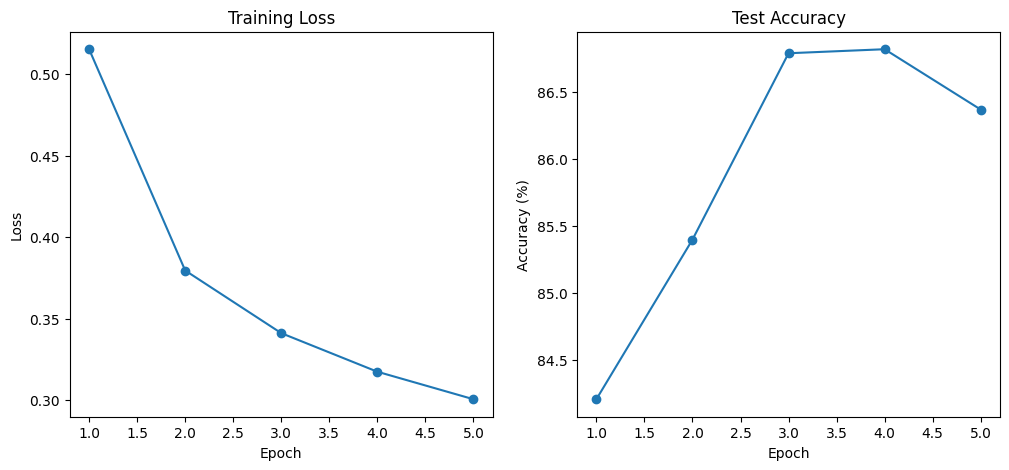

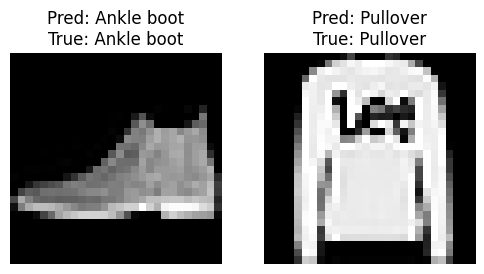

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), accuracies, marker='o')
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.show()

# Example prediction
model.eval()
examples = iter(test_loader)
images, labels = next(examples)

with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

plt.figure(figsize=(6,3))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}")
    plt.axis("off")
plt.show()